In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/DailyDelhiClimateTrain.csv")

print(data)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Basic structure and statistics
print("Dataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


            date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------  

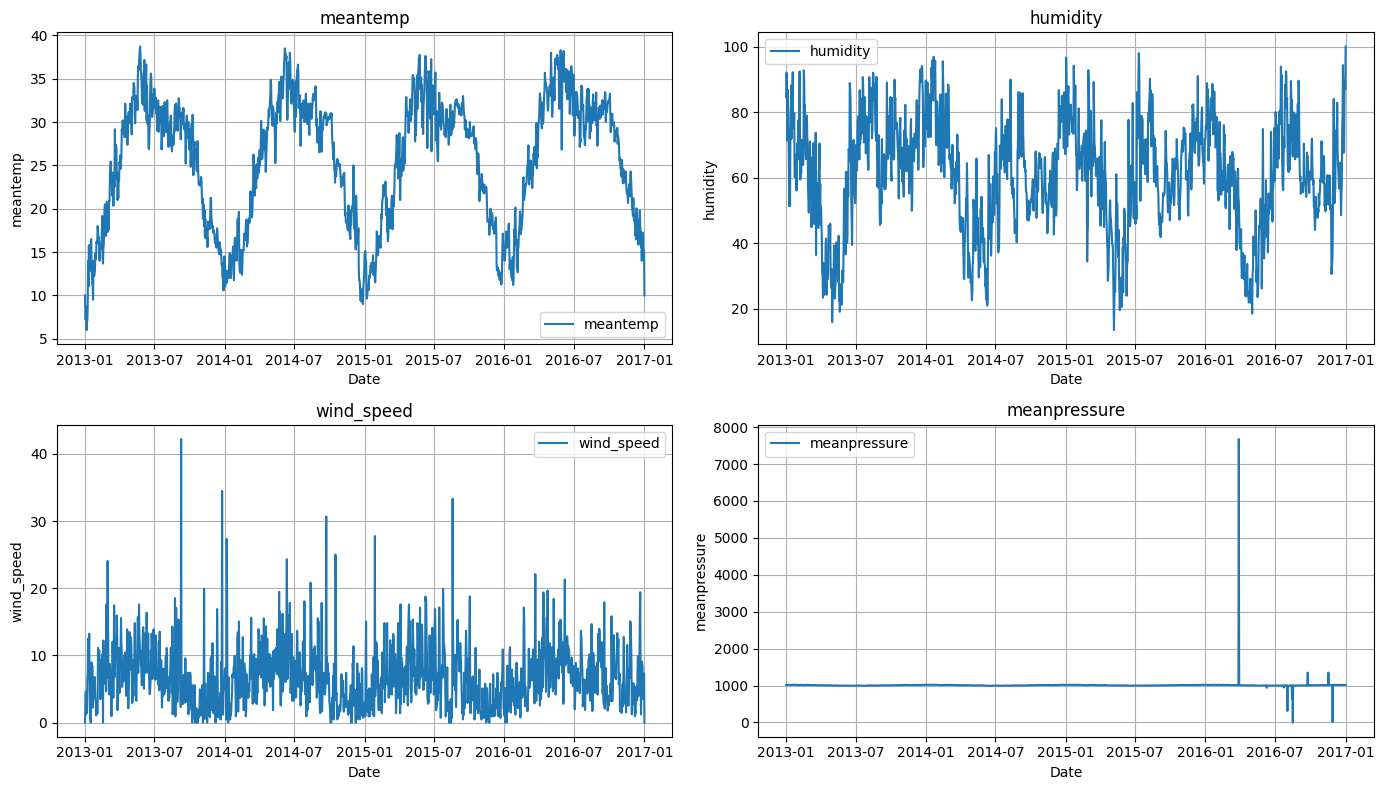

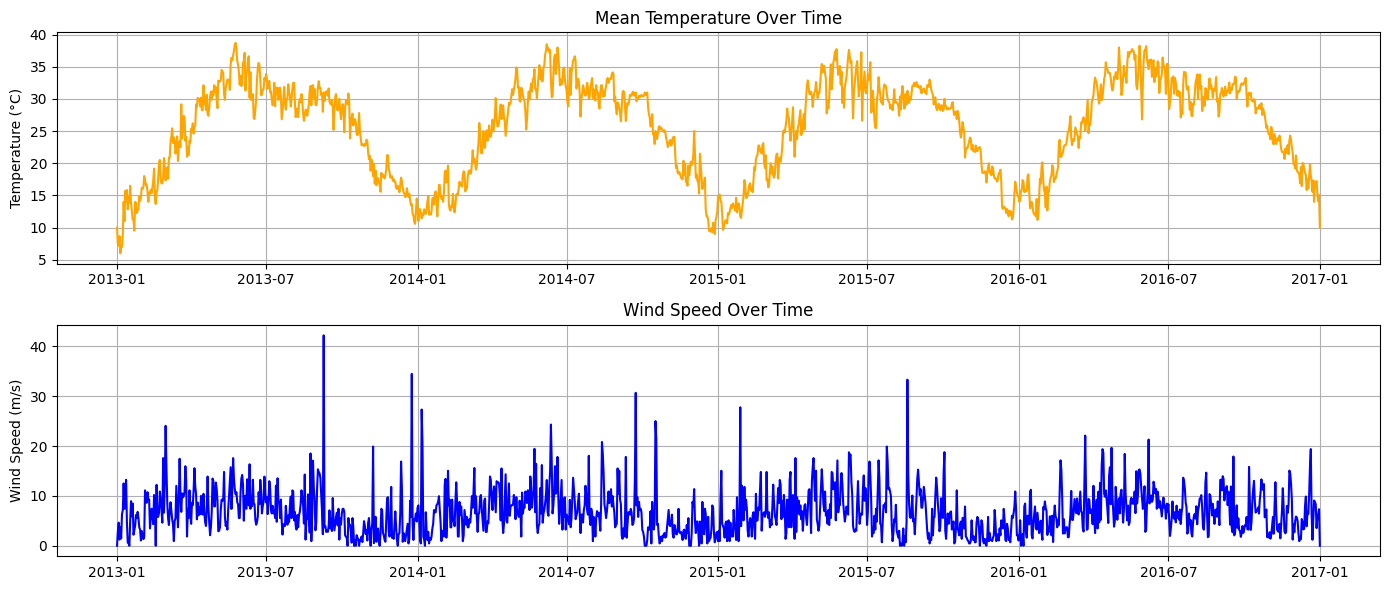

In [ ]:
import matplotlib.pyplot as plt

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Plot all variables
plt.figure(figsize=(14, 8))
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(data.index, data[column], label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid()
    plt.legend()
plt.tight_layout()
plt.show()

# Subplots: Mean Temperature vs Wind Speed
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(data.index, data['meantemp'], label='Mean Temperature', color='orange')
plt.title('Mean Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(data.index, data['wind_speed'], label='Wind Speed', color='blue')
plt.title('Wind Speed Over Time')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

plt.tight_layout()
plt.show()


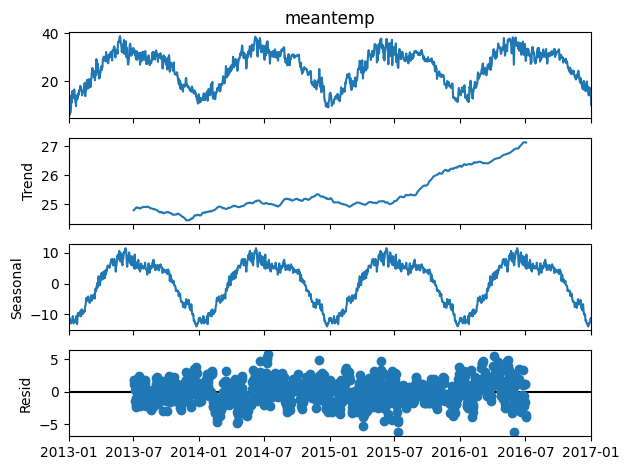

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the mean temperature time series
decompose_result = seasonal_decompose(data['meantemp'], model='additive', period=365)

# Plot decomposition
decompose_result.plot()
plt.show()


<ipython-input-6-3719b22c78f9>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_trend = trend[-1] + (np.arange(len(test)) * (trend[-1] - trend[-2]))


Mean Absolute Error (MAE): 9.238756150841864
Root Mean Squared Error (RMSE): 10.726876907772304


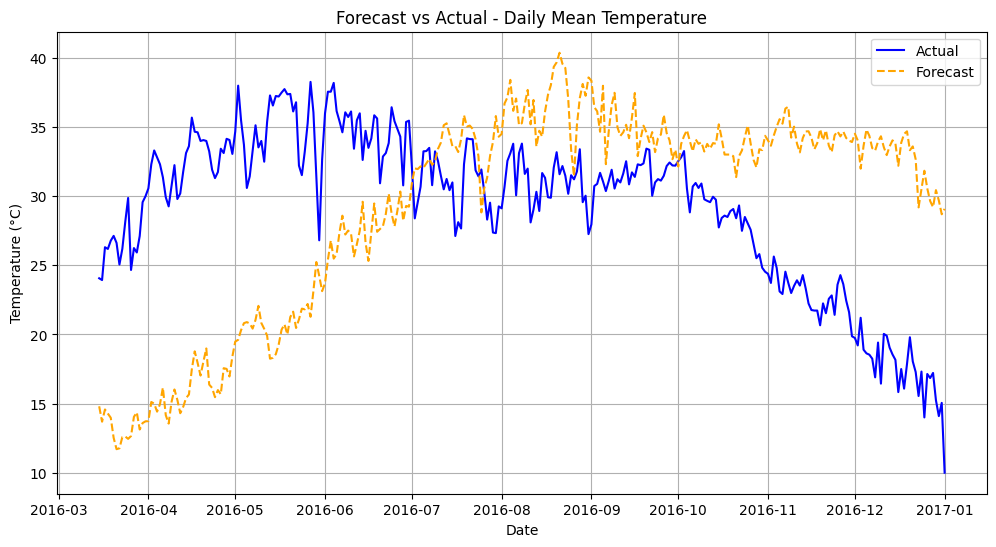

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data into training (80%) and testing (20%)
train = data.iloc[:int(len(data) * 0.8)]
test = data.iloc[int(len(data) * 0.8):]

# STL decomposition for training data
decompose_train = seasonal_decompose(train['meantemp'], model='additive', period=365)
trend = decompose_train.trend.dropna()
seasonal = decompose_train.seasonal.dropna()

# Forecast trend by extending the last trend value linearly
forecast_trend = trend[-1] + (np.arange(len(test)) * (trend[-1] - trend[-2]))
forecast_seasonal = seasonal[:len(test)]

# Combine trend and seasonal components
forecast = forecast_trend + forecast_seasonal.reset_index(drop=True)

# Evaluate forecast performance
mae = mean_absolute_error(test['meantemp'][:len(forecast)], forecast)
rmse = np.sqrt(mean_squared_error(test['meantemp'][:len(forecast)], forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['meantemp'], label='Actual', color='blue')
plt.plot(test.index[:len(forecast)], forecast, label='Forecast', linestyle='dashed', color='orange')
plt.title('Forecast vs Actual - Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.1508
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0120
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0099
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0092
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0079
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0074
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0083
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0075
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0075
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0067
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0073
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0068
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0063
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0062
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0060


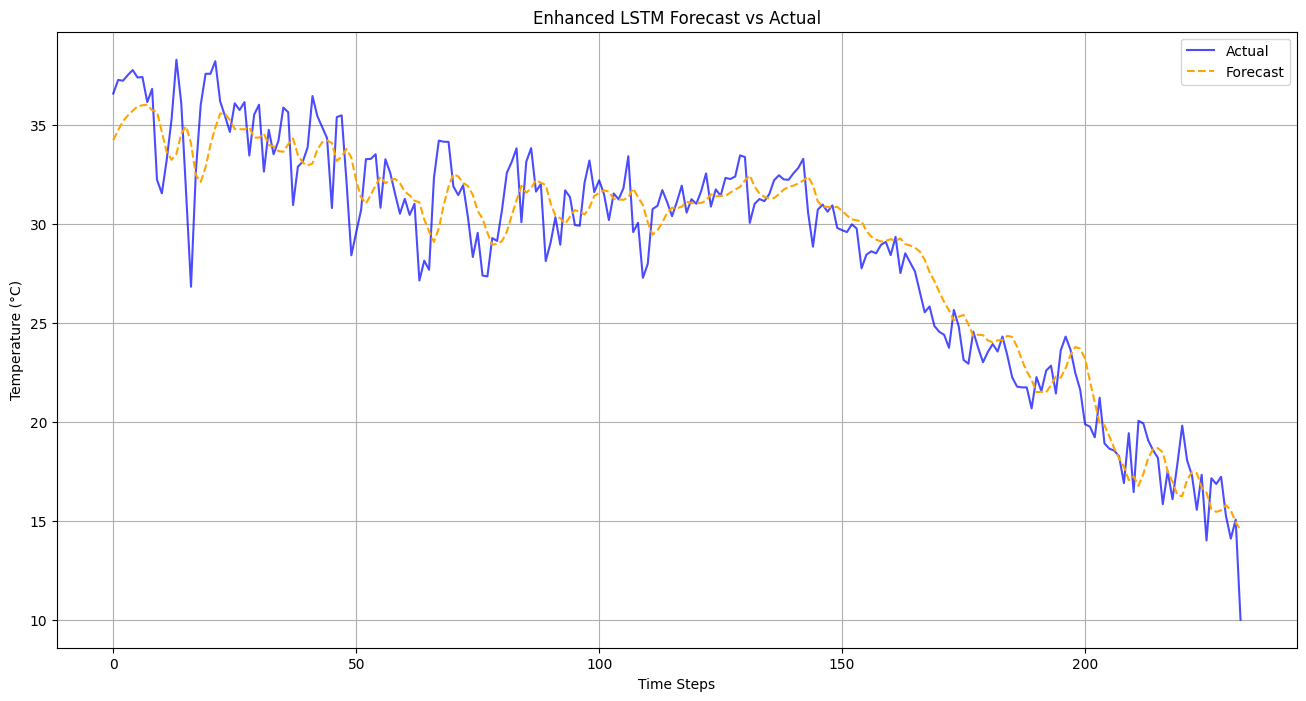

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and preprocess dataset
data = pd.read_csv("/content/DailyDelhiClimateTrain.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['meantemp']])

# Split into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Prepare sequences for LSTM
def create_sequences(data, sequence_length=60):  # Increased sequence length
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build enhanced LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),  # Dropout to prevent overfitting
    LSTM(100, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)  # More epochs

# Make predictions
y_pred = model.predict(X_test)

# Rescale predictions and actual values
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot forecast vs actual
plt.figure(figsize=(16, 8))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label='Actual', color='blue', alpha=0.7)
plt.plot(range(len(y_pred_rescaled)), y_pred_rescaled, label='Forecast', color='orange', linestyle='--')
plt.title('Enhanced LSTM Forecast vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


ADF Statistic: -2.0210690559206737
p-value: 0.2774121372301601


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA Model - MAE: 7.27, RMSE: 8.10


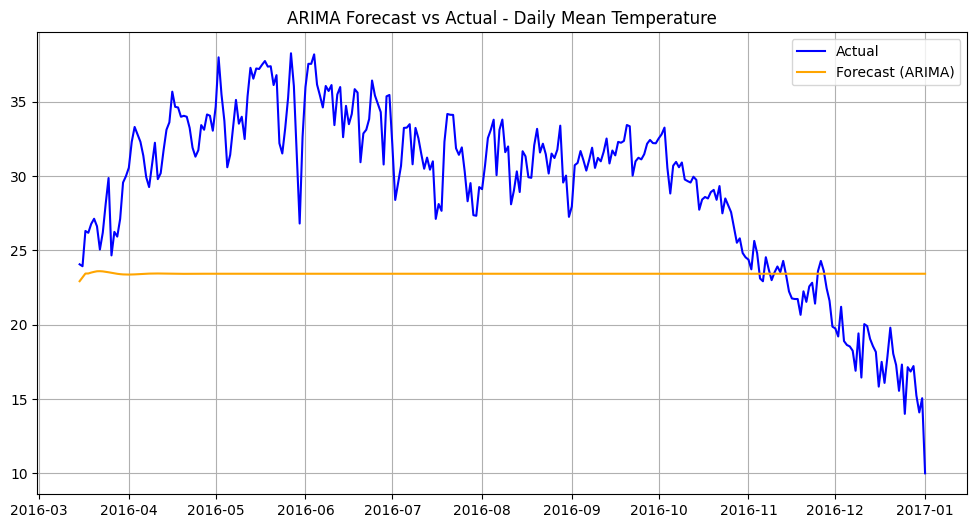

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
result = adfuller(data['meantemp'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Train ARIMA model
order = (5, 1, 2)  # Use appropriate values based on ACF/PACF analysis
arima_model = ARIMA(train['meantemp'], order=order)
arima_fit = arima_model.fit()

# Forecast
forecast = arima_fit.forecast(steps=len(test))
arima_mae = mean_absolute_error(test['meantemp'], forecast)
arima_rmse = np.sqrt(mean_squared_error(test['meantemp'], forecast))

print(f"ARIMA Model - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")

# Plot ARIMA forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['meantemp'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast (ARIMA)', color='orange')
plt.title('ARIMA Forecast vs Actual - Daily Mean Temperature')
plt.legend()
plt.grid()
plt.show()
